# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [1]:
### Who, What, and How for my data story

#Who:** The intended audience is business leaders and fraud prevention analysts at a financial institution who are responsible for monitoring and reducing fraudulent transactions.

#What:** The data story will focus on the patterns and characteristics of fraudulent transactions in the provided dataset, highlighting key risk factors and trends that can inform decision-making.

#How:** The story will be communicated using clear summary statistics, visualizations (such as bar charts showing class imbalance), and concise explanations to help the audience quickly understand the scale of the problem and identify actionable insights.

# 3. Homework - work with your own data

### Dataset Note

The dataset used for this assignment (`fraudTrain.csv` and `fraudTest.csv`)analysis presented here — including the graph and storytelling elements — is newly created and specifically tailored for this Week 2 homework assignment in OMDS. This is the selected dataset I plan to use for this project and semester. 


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [3]:
import pandas as pd

# Path to the files
path = "/Users/ricardosaint-albert/Desktop/BU Summer Classes 2025/AI for Leaders 2 DX699/Jupyter Coding Homework/Week 2/"

# Load the datasets
df_train = pd.read_csv(path + "fraudTrain.csv")
df_test = pd.read_csv(path + "fraudTest.csv")

# Quick check
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print(df_train.head())


Train shape: (1296675, 23)
Test shape: (555719, 23)
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1   

# Data Exploration and Preprocessing for fraudTrain.csv
This section summarizes, cleans, and explores the `fraudTrain.csv` dataset as required for your homework.

In [4]:
# Summarize the dataset using info() and describe()
print('--- DataFrame Info ---')
df_train.info()
print('\n--- DataFrame Describe ---')
df_train.describe(include='all')

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


In [5]:
# Check for duplicate rows
num_duplicates = df_train.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for duplicate values in a key column (e.g., trans_num)
if 'trans_num' in df_train.columns:
    trans_num_duplicates = df_train['trans_num'].duplicated().sum()
    print(f'Duplicate values in trans_num: {trans_num_duplicates}')

Number of duplicate rows: 0
Duplicate values in trans_num: 0


In [6]:
# Calculate mean, median, and mode for each numeric column
means = df_train.mean(numeric_only=True)
medians = df_train.median(numeric_only=True)
modes = df_train.mode().iloc[0]

print('Means:\n', means)
print('\nMedians:\n', medians)
print('\nModes:\n', modes)

Means:
 Unnamed: 0    6.483370e+05
cc_num        4.171920e+17
amt           7.035104e+01
zip           4.880067e+04
lat           3.853762e+01
long         -9.022634e+01
city_pop      8.882444e+04
unix_time     1.349244e+09
merch_lat     3.853734e+01
merch_long   -9.022646e+01
is_fraud      5.788652e-03
dtype: float64

Medians:
 Unnamed: 0    6.483370e+05
cc_num        3.521417e+15
amt           4.752000e+01
zip           4.817400e+04
lat           3.935430e+01
long         -8.747690e+01
city_pop      2.456000e+03
unix_time     1.349250e+09
merch_lat     3.936568e+01
merch_long   -8.743839e+01
is_fraud      0.000000e+00
dtype: float64

Modes:
 Unnamed: 0                                              0
trans_date_trans_time                 2019-04-22 16:02:01
cc_num                                     571365235126.0
merchant                                fraud_Kilback LLC
category                                    gas_transport
amt                                                  1.14


In [7]:
# Check for missing or null values
missing_values = df_train.isnull().sum()
print('Missing values per column:\n', missing_values)

# Optionally, fill missing values (if any) with the mean of the column
df_filled = df_train.fillna(df_train.mean(numeric_only=True))

Missing values per column:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [8]:
# Identify inconsistent data
# Example: Check for negative amounts (should not happen)
if 'amt' in df_train.columns:
    negative_amounts = df_train[df_train['amt'] < 0]
    print(f'Number of transactions with negative amount: {len(negative_amounts)}')

Number of transactions with negative amount: 0


In [9]:
# Encode categorical variables (if any)
# Example: One-hot encode 'category' column if it exists
if 'category' in df_train.columns:
    df_encoded = pd.get_dummies(df_train, columns=['category'])
    print('Categorical variable "category" one-hot encoded.')
else:
    print('No "category" column to encode.')

Categorical variable "category" one-hot encoded.


In [10]:
# Conclusions and class imbalance analysis
if 'is_fraud' in df_train.columns:
    num_fraud = df_train['is_fraud'].sum()
    total = len(df_train)
    fraud_percent = (num_fraud / total) * 100
    print(f'Total transactions: {total}')
    print(f'Fraudulent transactions: {num_fraud} ({fraud_percent:.4f}%)')
    if fraud_percent < 5:
        print('There is a significant class imbalance (fraud cases are rare).')
    else:
        print('Class distribution is more balanced.')
else:
    print('No "is_fraud" column found for class imbalance analysis.')

Total transactions: 1296675
Fraudulent transactions: 7506 (0.5789%)
There is a significant class imbalance (fraud cases are rare).


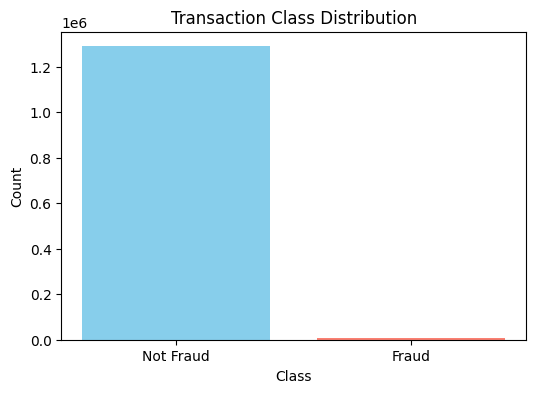

In [11]:
# Example: Bar chart showing class distribution (fraud vs. not fraud)
import matplotlib.pyplot as plt
if 'is_fraud' in df_train.columns:
    class_counts = df_train['is_fraud'].value_counts()
    plt.figure(figsize=(6,4))
    plt.bar(['Not Fraud', 'Fraud'], class_counts, color=['skyblue', 'salmon'])
    plt.title('Transaction Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
else:
    print('No "is_fraud" column found for plotting.')